In [1]:
#global imports
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os, shutil
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## <b>Tensor</b>
## What is a Tensor?
- At its core, a tensor is a container for data-almost numeric data. So it's a container for numbers.
- Matrices are 2D tensors, and tensors can be called a generalization of matrices to an arbitrary number of dimensions
- NOTE: In context of tensors, a dimension is often called an axis

<b>Different types of tensors</b><br/>![tensor](tensor.jpeg)

In [2]:
x = np.array([14,12,3,41,121])
print("Dimensions of the tensor is: {0}".format(x.ndim))

Dimensions of the tensor is: 1


<br/>This vector has 5 entries, so it's a 5-dimensional vector. <b>DONT CONFUSE A 5D VECTOR WITH A 5D TENSOR</b>. A 5D vector only has a single axis and 5 dimensions along its axis, whereas a 5D tensor has 5 axes and any number of dimensions along each axis. Technically, it's more correct to talk about <i>a tensor of rank 5</i>(where rank is the number of axes)

## <b>Building a baseline neural network</b>
So we will build a neural network using just a Dense(also called a fully connected layer) and an activation layer(in this case a softmax) to classify a basic problem like MNIST

In [3]:
#getting the data first
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
#Defining our network architecture

baseline_nn = models.Sequential()
baseline_nn.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) #relu = max(n,0)
baseline_nn.add(layers.Dense(10, activation='softmax')) #softmax will return a probability score of all the digits
baseline_nn.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
baseline_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
#before training,we will create a single feature axes of an image, reshaping all the values in a 1D tensor
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [6]:
#One hot encode the train and test labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
baseline_nn.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2548 - accuracy: 0.9253
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1028 - accuracy: 0.9688
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0678 - accuracy: 0.9797
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0487 - accuracy: 0.9853
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0364 - accuracy: 0.9888


In [8]:
baseline_test_loss, baseline_test_acc = baseline_nn.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.0751 - accuracy: 0.9761


In [9]:
print('BASELINE TEST ACCURACY: {0} \nBASELINE TEST LOSS: {1}'.format(baseline_test_acc,baseline_test_loss))

BASELINE TEST ACCURACY: 0.9761000275611877 
BASELINE TEST LOSS: 0.07507315585038159


<br/>97% accuracy on a baseline model!! That's a tough one to beat

## <b>Convolutional Neural Networks</b>
<br/>![simple_cnn](simple_cnn.jpeg)

In [10]:
#Initializing a convnet

basic_cnn = models.Sequential()
basic_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
basic_cnn.add(layers.MaxPooling2D((2, 2)))
basic_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
basic_cnn.add(layers.MaxPooling2D((2, 2)))
basic_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

basic_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Now let's attach a convnet to a flatten layer to predict outputs
basic_cnn.add(layers.Flatten())
basic_cnn.add(layers.Dense(64, activation='relu'))
basic_cnn.add(layers.Dense(10, activation='softmax'))

basic_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [12]:
#To make the input clear, we gotta reformat the input data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
basic_cnn.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
basic_cnn.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1741 - accuracy: 0.9455
Epoch 2/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0459 - accuracy: 0.9857
Epoch 3/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0323 - accuracy: 0.9900
Epoch 4/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0253 - accuracy: 0.9920
Epoch 5/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0188 - accuracy: 0.9941


In [14]:
basic_cnn_test_loss, basic_cnn_test_acc = basic_cnn.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 70us/sample - loss: 0.0257 - accuracy: 0.9924


In [15]:
print('BASIC CNN TEST ACCURACY: {0} \nBASIC CNN TEST LOSS: {1}'.format(basic_cnn_test_acc,basic_cnn_test_loss))

BASIC CNN TEST ACCURACY: 0.9923999905586243 
BASIC CNN TEST LOSS: 0.02566207508670159


<br>WE JUMPED FROM 97% TO 99% ACCURACY. AN IMPROVEMENT OF 68%(relatively)! Let's see how
## <b>The Convolution Operation - The reason why CNNs are the champs in Computer Vision</b>

![convolution](convolution.png)

#### The fundamental Difference between Dense layer and a Convolution layer is that `Dense` layers learn <b>global</b> patterns in their input feature space(all pixels, in an example of a MNIST digit), whereas `Convolution` layers learn <b>local</b> patterns.

`Convnets` have 2 properties which attribute to this key characteristic:
- `The patterns they learn are translation invariant`. After learning a certain pattern in the lower-right corner of a picture, a convnet can recognize it anywhere. This makes convnets data efficient when processing images(because the <i>visual world is fundamentally translation invarient</i>): they need fewer training samples to learn representations that have generalization power
- `They can learn spatial hierarchies of patterns(see Below)`. A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn longer patterns made of features of the first layers, and so on. This enables convnets to efficiently learn increasingly complex and abstract visual concepts

![cnn_spatial_hierarchy](cnn_spatial_hierarchy.png)

### <b>Convolution Operations and Feature Maps</b>

- Convolutions operate over 3D tensors, called `feature maps`, with `two spatial axes(height and width)` as well as a `depth or channels` axis. For RGB images, the depth axis is 3 because of the 3 colour channels: red,green and blue. For black-and-white images(like MNIST), the depth is 1
- The convolution operation extracts patches from its input feature map and applies the same transformation to all of these patches, producing `output feature map`. This output feature map <b>is still a 3D tensor: it has width and height, but the depth can be arbitrary</b>, because the output depth is a parameter of the layer, and <b>the different channels in the depth axis no longer stand for specific colours, rather they stand for <i>filters</i></b>
-Filters encode specific parts of the input data. A single filter could include the concept "presence of face in the input"
-The first convolution layer is taking a feature map of a size `(28,28,1)` and outputs a feature map of size `(26, 26, 32)`: It computes 32 filters over the image. Each of these 32 output channels is of the size `26x26`, which can also be called as the <b>response map</b> of the filter over the input image.

#### This is what feature map intuitively means, every dimension in the depth axis is a feature(or <i>filter</i>), and the 2D tensor `output[:,:,n]` is the 2D <i>spatial map</i> if the response of this filter over the input image
![cnn_feature_map](cnn_feature_map.png)

## <b>Different Types of filters and their outputs</b>
## <b>Simple Box Blur</b><br/>
![simple_blur](conv-simple-blur.jpg)
![simple_blur](conv-simple-blur-result1.jpg)

## <b>Edge Detection</b><br/>
![edge_detection](conv-edge-detection.jpg)
![edge_detection](conv-edge-detection-result.jpg)

## <b>The Laplacian of Gaussian</b><br/>
![edge_detection](conv-laplacian-of-gaussian.jpg)
![edge_detection](conv-laplacian-of-gaussian-result.jpg)

Convolutions are defined by 2 key parameters:
- <i>Size of the patches from the inputs</i>: These are typically 3x3 or 5x5
- <i>Depth of the output feature map</i>: The number of filters computed by the convolution

### <b>How Convolution works</b>

- A convolution works by <i>sliding</i> these windows of size 3x3 or 5x5 over the 3D input feature maps, stopping at every possible location and extracting the 3D patch of the surrounding features. The shape is `(window_height, window_width, input_depth)`.<br/>
![convolution_schematic](convolution_schematic.gif)

- Each such 3D patch is then transformed(via tensor product with the weight matrix) into a 1D vector of shape `(output_depth, )`.All of these are then spatially reassembled into a 3D output map of shape `(height, width, output_depth)`.

- <b>NOTE: Every spatial location in the output feature map corresponds to the same location in the input feature map</b>

![convolution_transformation](convolution_transformation_patches.png)

- The output width and the height may differ from the input width and height because of 2 reasons:
    - <i>Border effects</i> which can be encountered by padding the input feature map
    - <i>Strides</i>

### <b>Border Effects, Padding and Strides</b>

- Basic Convolution filter creating an output feature map. It loses a lot of input values. Pass parameter value `valid` for this in keras.model<br/>
![no_padding_no_strides](no_padding_no_strides.gif)

- If you want to use the output feature map as the same spatial dimension as the input, you use `padding`. Padding consists of adding an apt no of rows and columns on each side of the feature map so as to make it possible to fit center convolution windows around every input tile.

- Some of the examples of padding are:
    - <b>Full padding</b> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<b>Same padding</b>
    - ![full_padding_no_strides](full_padding_no_strides.gif)![same_padding_no_strides](same_padding_no_strides.gif)

- Other factor that can influence output size are `strides`. So far it's assumed that the center tiles of the convolution windows are all contiguous. But the distance between 2 successive windows is a parameter of the convolution, called its `stride`. It is possible to have strided convolution
<br>

<b>Patches extracted by a 3x3 convolution with stride 2 over a 5x5 input (without padding)</b><br/>
![convolution_stride](convolution_stride.png)
- Furthermore we can also merge padding and strides. Here are some of the examples of padding and strides:
    - <b>Padding and strides</b> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<b>Odd padding and strides</b>
    - ![padding_strides](padding_strides.gif)![padding_strides_odd](padding_strides_odd.gif)


If we use stride 2 we are basically downsampling the input feature map by a factor of 2(in addition to any changes done by the border effects). But if we want to downsample feature maps, instead of strides we can use the <i>max-pooling</i> operation

### <b>Max Pooling</b>

If you look at the convnet example, the size of the feature maps is halved after every `MaxPooling2D` layer. That's the job of MaxPooling - to aggressively downsample feature maps.
![basic_cnn_architecture](basic_cnn_architecture.png)

- Max Pooling consists of extracting windows from the input feature maps and outputting the max value of each channel. It is conceptually similar to the convolution, except that instead of transforming local patches via a learned linear transformation (the <i>convolution</i> kernel), they are transformed via a hardcoded `max` tensor operation.<br>
![max_pooling](max_pooling.gif)

- A big difference from convolution is that max pooling is done with `2x2` window with stride 2, in order to downsample the feature maps by a factor of 2. On the other hand the convolution is done with `3x3` window with no stride.

## <b>For an input image with size of i, kernel size of k, padding of p, and stride of s, the output image from convolution has size o:</b>
![convolution_size](convolution_size.png)

### <b> Why downsample at all?</b>
Lets check with a model with no max pooling

In [16]:
basic_cnn_no_max_pool = models.Sequential()
basic_cnn_no_max_pool.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
basic_cnn_no_max_pool.add(layers.Conv2D(64, (3,3), activation='relu'))
basic_cnn_no_max_pool.add(layers.Conv2D(64, (3,3), activation='relu'))
basic_cnn_no_max_pool.add(layers.Flatten())
basic_cnn_no_max_pool.add(layers.Dense(512, activation='relu'))
basic_cnn_no_max_pool.add(layers.Dense(10, activation='softmax'))
basic_cnn_no_max_pool.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               15860224  
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 15,921,098
Trainable params: 15,921,098
Non-trainable params: 0
__________________________________________

### <b>What is wrong with the above architecture?</b>

2 things:
- It is counter intuitive to the spatial hierarchy of features. The `3x3` windows in the third layer will only contain information coming from the `3x3` windows in the initial output. The high level patterns learnt by the convnet will still be very small compared to the initial input(Try recognizing a MNIST image by just looking at 3x3 pixel). <b>We need the features from the last convolution layer to contain information about the totality of the input</b>
- The final feature map has `22x22x64` = 30,976 total coefficients. To get a comparable `Dense` layer we gotta make the Dense layer bigger upto 512. This will result in a total of 15.9 million parameters!! This is far too large and will result in intense overfitting

## <b>Example Session: Cats and Dogs</b>

We will train a CNN on a cats dogs dataset. A binary classification problem where the total dataset size is 25000 images. But to make the challenge harder, we are going to use only 2000 images

In [17]:
shutil.rmtree('/tf/notebooks/deep_learning/data/deep_learning_with_python/dogs_cats/dogs_cats_small/') #removing the directory is it's already there

Retriving our 2k images from the original dataset

In [18]:
#The path to the directory where the original dataset is stored(uncompressed)
original_dataset_dir = '/tf/notebooks/deep_learning/data/deep_learning_with_python/dogs_cats/dogs_cats_original'

#The path to the directory where we will store our smaller dataset
base_dir = '/tf/notebooks/deep_learning/data/deep_learning_with_python/dogs_cats/dogs_cats_small'
os.mkdir(base_dir)

#Making directories for training, validating and testing sub-directories
for name in ['train', 'validation', 'test']:
    exec("{0}_dir = os.path.join(base_dir,'{1}')".format(name, name))
    exec("os.mkdir({0}_dir)".format(name))

#mapper_dictionary
mapper ={
    "train": (0, 1000),
    "validation": (1000, 1500),
    "test": (1500, 2000)
}

label_mapper = {
    "cats": "cat",
    "dogs": "dog"
}
    
    
#Filling directories with cat and dog images
for subdirectory in ['train','validation','test']:
    subdirectory_range = mapper[subdirectory]
    for label in ['cats','dogs']:
        exec("{0}_{1}_dir = os.path.join({2}_dir,'{3}')".format(subdirectory, label, subdirectory, label))
        exec("os.mkdir({0}_{1}_dir)".format(subdirectory, label))
        
        fnames = ['{0}.{1}.jpg'.format(label_mapper[label],i) for i in range(subdirectory_range[0], subdirectory_range[1])]
        for fname in fnames:
            src = os.path.join(original_dataset_dir, fname)
            exec("dst = os.path.join({0}_{1}_dir, fname)".format(subdirectory,label))
            shutil.copy(src, dst)

## <b>Building our network</b>

We've already built a small convnet for MNIST in the previous example, so you should be familiar with them. We will reuse the same 
general structure: our convnet will be a stack of alternated `Conv2D` (with `relu` activation) and `MaxPooling2D` layers.

However, since we are dealing with bigger images and a more complex problem, we will make our network accordingly larger: it will have one 
more `Conv2D` + `MaxPooling2D` stage. This serves both to augment the capacity of the network, and to further reduce the size of the 
feature maps, so that they aren't overly large when we reach the `Flatten` layer. Here, since we start from inputs of size 150x150 (a 
somewhat arbitrary choice), we end up with feature maps of size 7x7 right before the `Flatten` layer.

Note that the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is 
decreasing (from 148x148 to 7x7). This is a pattern that you will see in almost all convnets.

Since we are attacking a binary classification problem, we are ending the network with a single unit (a `Dense` layer of size 1) and a 
`sigmoid` activation. This unit will encode the probability that the network is looking at one class or the other.

In [19]:
cats_dogs_scratch = models.Sequential()
cats_dogs_scratch.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
cats_dogs_scratch.add(layers.MaxPooling2D((2, 2)))
cats_dogs_scratch.add(layers.Conv2D(64, (3, 3), activation='relu'))
cats_dogs_scratch.add(layers.MaxPooling2D((2, 2)))
cats_dogs_scratch.add(layers.Conv2D(128, (3, 3), activation='relu'))
cats_dogs_scratch.add(layers.MaxPooling2D((2, 2)))
cats_dogs_scratch.add(layers.Conv2D(128, (3, 3), activation='relu'))
cats_dogs_scratch.add(layers.MaxPooling2D((2, 2)))
cats_dogs_scratch.add(layers.Flatten())
cats_dogs_scratch.add(layers.Dense(512, activation='relu'))
cats_dogs_scratch.add(layers.Dense(1, activation='sigmoid')) #sigmoid layer as it is a binary classification problem

cats_dogs_scratch.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

Compiling the model

In [20]:
cats_dogs_scratch.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

## <b>Data preprocessing</b>

As you already know by now, data should be formatted into appropriately pre-processed floating point tensors before being fed into our 
network. Currently, our data sits on a drive as JPEG files, so the steps for getting it into our network are roughly:

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but thankfully Keras has utilities to take care of these steps automatically. Keras has a module with image 
processing helper tools, located at `tensorflow.keras.preprocessing.image`. In particular, it contains the class `ImageDataGenerator` which allows to 
quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we 
will use here.

In [21]:
#Rescaling images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    #This is the target directory 
    train_dir,
    #Resizing the images to 150x150
    target_size=(150, 150),
    batch_size=20,
    #Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let's take a look at the output of one of these generators: it yields batches of 150x150 RGB images (shape `(20, 150, 150, 3)`) and binary 
labels (shape `(20,)`). 20 is the number of samples in each batch (the batch size). Note that the generator yields these batches 
indefinitely: it just loops endlessly over the images present in the target folder. For this reason, we need to `break` the iteration loop 
at some point.

In [22]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Let's fit our model to the data using the generator. We do it using the `fit` method. It expects as first argument a Python generator that will yield batches of inputs and targets indefinitely, like ours does. 
Because the data is being generated endlessly, the generator needs to know example how many samples to draw from the generator before 
declaring an epoch over. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the 
generator, i.e. after having run for `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch. In our case, 
batches are 20-sample large, so it will take 100 batches until we see our target of 2000 samples.

When using `fit`, one may pass a `validation_data` argument. Importantly, this argument is 
allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as `validation_data`, then 
this generator is expected to yield batches of validation data endlessly, and thus you should also specify the `validation_steps` argument, 
which tells the process how many batches to draw from the validation generator for evaluation.

In [23]:
history = cats_dogs_scratch.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 9s 94ms/step - loss: 0.6895 - acc: 0.5365 - val_loss: 0.6735 - val_acc: 0.5920
Epoch 2/30
100/100 [==============================] - 8s 76ms/step - loss: 0.6597 - acc: 0.6030 - val_loss: 0.6740 - val_acc: 0.5680
Epoch 3/30
100/100 [==============================] - 8s 84ms/step - loss: 0.6217 - acc: 0.6475 - val_loss: 0.6431 - val_acc: 0.6390
Epoch 4/30
100/100 [==============================] - 9s 88ms/step - loss: 0.5818 - acc: 0.6955 - val_loss: 0.5972 - val_acc: 0.6760
Epoch 5/30
100/100 [==============================] - 10s 103ms/step - loss: 0.5361 - acc: 0.7415 - val_loss: 0.5877 - val_acc: 0.6950
Epoch 6/30
100/100 [==============================] - 10s 105ms/step - loss: 0.5072 - acc: 0.7425 - val_loss: 0.6076 - val_acc: 0.6780
Epoch 7/30
100/100 [==============================] - 12s 120ms/step - loss: 0.4816 - acc: 0.7735 - val_loss: 0.5974 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 31s 311ms

In [24]:
#Please save model after training unless you want it to be deleted
cats_dogs_scratch.save("cats_and_dogs_scratch.h5")

Pointing the plot of loss and accuracy of the model over training and validation data during the training:

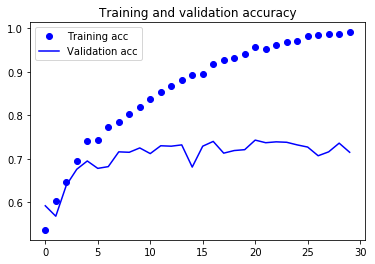

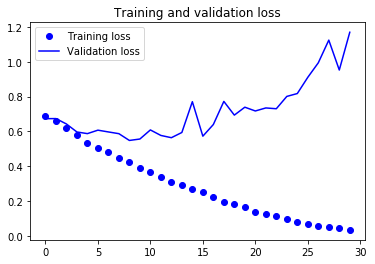

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

## <b>Using data augmentation to increase accuracy just for computer vision tasks</b>

Overfitting is caused by having too few samples to learn from, rendering us unable to train a model able to generalize to new data. 
Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. Data 
augmentation takes the approach of generating more training data from existing training samples, by "augmenting" the samples via a number 
of random transformations that yield believable-looking images. The goal is that at training time, our model would never see the exact same 
picture twice. This helps the model get exposed to more aspects of the data and generalize better.

In `tensorflow.Keras`, this can be done by configuring a number of random transformations to be performed on the images read by our `ImageDataGenerator` 
instance. Let's get started with an example:

In [32]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

These are just a few of the options available (for more, see the Keras documentation). Let's quickly go over what we just wrote:

* `rotation_range` is a value in degrees (0-180), a range within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures 
vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal 
asymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

Let's take a look at our augmented images:

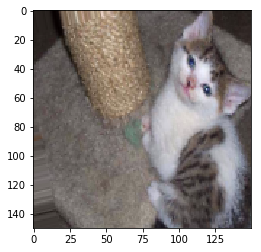

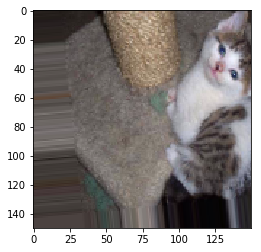

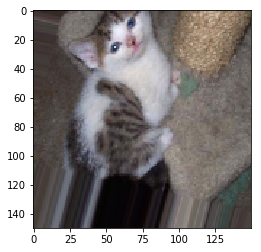

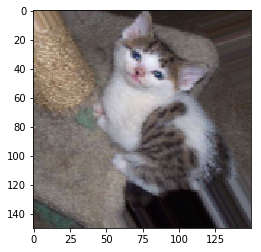

In [33]:
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

If we train a new network using this data augmentation configuration, our network will never see twice the same input. However, the inputs 
that it sees are still heavily intercorrelated, since they come from a small number of original images -- we cannot produce new information, 
we can only remix existing information. As such, this might not be quite enough to completely get rid of overfitting. To further fight 
overfitting, we will also add a Dropout layer to our model, right before the densely-connected classifier:

In [34]:
cats_dog_data_aug = models.Sequential()
cats_dog_data_aug.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
cats_dog_data_aug.add(layers.MaxPooling2D((2, 2)))
cats_dog_data_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
cats_dog_data_aug.add(layers.MaxPooling2D((2, 2)))
cats_dog_data_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
cats_dog_data_aug.add(layers.MaxPooling2D((2, 2)))
cats_dog_data_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
cats_dog_data_aug.add(layers.MaxPooling2D((2, 2)))
cats_dog_data_aug.add(layers.Flatten())
cats_dog_data_aug.add(layers.Dropout(0.5))
cats_dog_data_aug.add(layers.Dense(512, activation='relu'))
cats_dog_data_aug.add(layers.Dense(1, activation='sigmoid'))

cats_dog_data_aug.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Let's look at the summary of the model

In [35]:
cats_dog_data_aug.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 128)      

In [36]:
#Training our network using the data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#NOTE: VALIDATION DATA MUST NOT BE AUGMENTED!!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = cats_dog_data_aug.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 50s 497ms/step - loss: 0.6947 - acc: 0.5117 - val_loss: 0.6887 - val_acc: 0.5260
Epoch 2/100
100/100 [==============================] - 40s 401ms/step - loss: 0.6804 - acc: 0.5656 - val_loss: 0.6579 - val_acc: 0.6015
Epoch 3/100
100/100 [==============================] - 41s 413ms/step - loss: 0.6702 - acc: 0.5895 - val_loss: 0.6426 - val_acc: 0.6269
Epoch 4/100
100/100 [==============================] - 39s 391ms/step - loss: 0.6600 - acc: 0.5974 - val_loss: 0.6229 - val_acc: 0.6497
Epoch 5/100
100/100 [==============================] - 36s 364ms/step - loss: 0.6442 - acc: 0.6165 - val_loss: 0.6115 - val_acc: 0.6808
Epoch 6/100
100/100 [==============================] - 48s 485ms/step - loss: 0.6197 - acc: 0.6624 - val_loss: 0.6044 - val_acc: 0.6726
Epoch 7/100
100/100 [==============================] - 43s 428ms/step - loss: 0.6116 - acc: 0.6622 -

In [37]:
cats_dog_data_aug.save('cats_and_dogs_data_aug.h5')

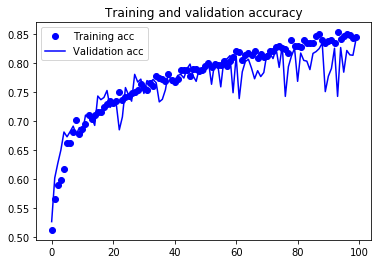

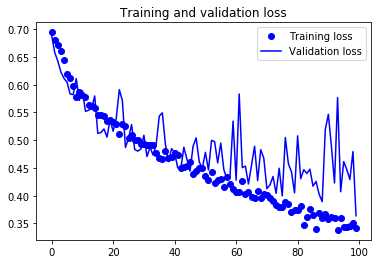

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## <b>Thank You! Questions?</b>